In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes = True)

In [12]:
movies = pd.read_csv('fandango_score_comparison.csv')
movies.head(10)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


In [14]:
#quick look at metacritic ratings
print(movies["Metacritic_norm_round"].value_counts())

3.0    27
4.0    25
2.5    22
1.5    20
3.5    20
4.5    15
2.0    14
1.0     2
0.5     1
Name: Metacritic_norm_round, dtype: int64


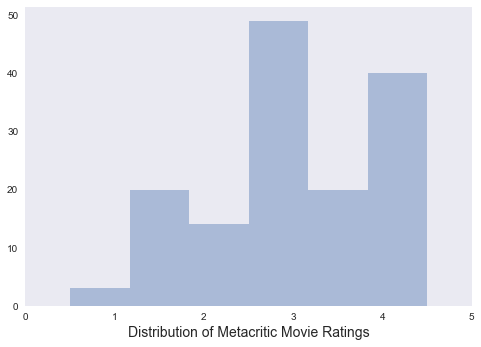

In [19]:
mc_norm_round = sns.distplot(movies["Metacritic_norm_round"], kde = False )
axes = mc_norm_round.axes
axes.set_xlim(0,5)
axes.grid(False)
axes.set_xlabel('Distribution of Metacritic Movie Ratings', fontsize = 14)

In [26]:
#this shows spread but have to forgive positions

In [22]:
print(movies["Fandango_Stars"].value_counts())

4.5    55
4.0    41
3.5    27
3.0    12
5.0    11
Name: Fandango_Stars, dtype: int64


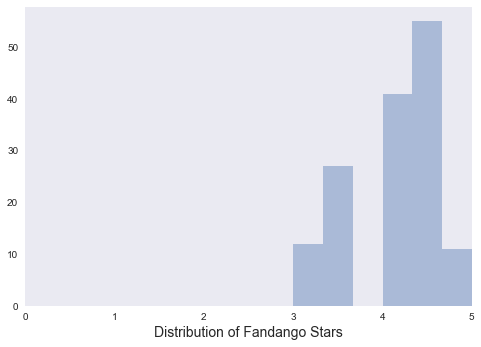

In [21]:
fnd_stars = sns.distplot(movies["Fandango_Stars"], kde = False )
axes = fnd_stars.axes
axes.set_xlim(0,5)
axes.grid(False)
axes.set_xlabel('Distribution of Fandango Stars', fontsize = 14)

Fandango ratings are clearly higher on average whereas metacritic has a more even distribution. There are no fandango ratings below 3 stars, which means that you can probably trust a high Fandango rating more. 

While a quick visualisation is all well and good, calculating summary statistics will give us a better idea of their differences

In [23]:
mean_fnd_stars = sum(movies["Fandango_Stars"]) / len(movies["Fandango_Stars"])
mean_mc_norm_round = sum(movies["Metacritic_norm_round"]) / len(movies["Metacritic_norm_round"])
median_fnd_stars = np.median(movies["Fandango_Stars"])
median_mc_norm_round = np.median(movies["Metacritic_norm_round"])
std_fnd_stars = np.std(movies["Fandango_Stars"])
std_mc_norm_round = np.std(movies["Metacritic_norm_round"])

In [28]:
print("Fandango ratings mean:",format(mean_fnd_stars,'.1f'))
print("Metacritic ratings mean:",format(mean_mc_norm_round,'.1f'))
print('-----')
print("Fandango rating median:",median_fnd_stars)
print("Metacritic rating median:",median_mc_norm_round)
print('-----')
print("Fandango rating standard deviation:",format(std_fnd_stars,'.1f'))
print("Metacritic rating standard deviation:",format(std_mc_norm_round, '.1f'))

Fandango ratings mean: 4.1
Metacritic ratings mean: 3.0
-----
Fandango rating median: 4.0
Metacritic rating median: 3.0
-----
Fandango rating standard deviation: 0.5
Metacritic rating standard deviation: 1.0


In terms of methodology, Fandango appears to give higher ratings, with at least half of all receiving more than 4/5. Metacritic publishes critic ratings, and is transparent about how they aggregate them to get a final rating.

The median metacritic score is noticeably higher than the mean because a few very low scores influence the mean more. The median fandango score is lower than the mean fandango score because a few very high ratings "drag up" the mean.

Fandango ratings are mostly grouped between 3 and 5, and have a much narrower random than Metacritic reviews, which range between 0 and 5.

Now to look at correlations, and whether we could predict Fandango ratings based on those of metacritic:

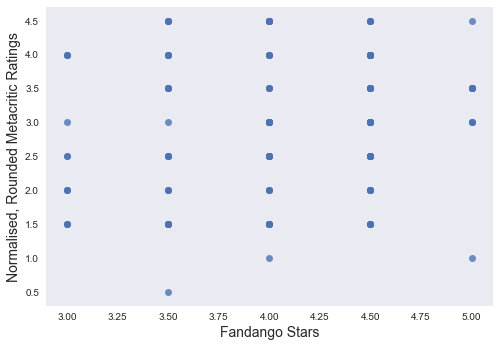

In [31]:
scatter = sns.regplot(x=movies["Fandango_Stars"], y=movies["Metacritic_norm_round"], fit_reg=False)
scatter.grid(False)
scatter.set_xlabel('Fandango Stars', Fontsize = 14)
scatter.set_ylabel('Normalised, Rounded Metacritic Ratings', Fontsize = 14)

Looking at differences:

In [34]:
movies["fm_diff"] = movies["Metacritic_norm_round"] - movies["Fandango_Stars"]

In [35]:
movies["fm_diff"] = abs(movies["fm_diff"])

In [36]:
movies.sort_values("fm_diff", ascending=False).head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


In [37]:
from scipy.stats.stats import pearsonr

In [38]:
r, p_value = pearsonr(movies["Metacritic_norm_round"], movies["Fandango_Stars"])


In [39]:
print("r value is:",format(r, '.2f'))
print("p value is:",format(p_value, '.2f'))

r value is: 0.18
p value is: 0.03


Correlation is not high as shown by r value, so Fandango scores are not inflated, they are somehow fundamentally different in their ratings. While linear regression might not tell us much (given that there isn't much of a linear correlation) it would be one way of predicting Fandango ratings from metacritic ratings if there were one. 

In [46]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
pred_3 = 3 * slope + intercept
prediction = format(pred_3, '.1f')
print('For a movie rated 3 on Metacritic, predict a rating of',prediction,'on Fandango')

For a movie rated 3 on Metacritic, predict a rating of 4.1 on Fandango


In [48]:
pred_1 = slope + intercept

prediction = format(pred_1, '.1f')
print('For a movie rated 1 on Metacritic, predict a rating of',prediction,'on Fandango')

For a movie rated 1 on Metacritic, predict a rating of 3.9 on Fandango


In [49]:
pred_5 = 5 * slope + intercept
prediction = format(pred_5, '.1f')
print('For a movie rated 5 on Metacritic, predict a rating of',prediction,'on Fandango')

For a movie rated 5 on Metacritic, predict a rating of 4.3 on Fandango


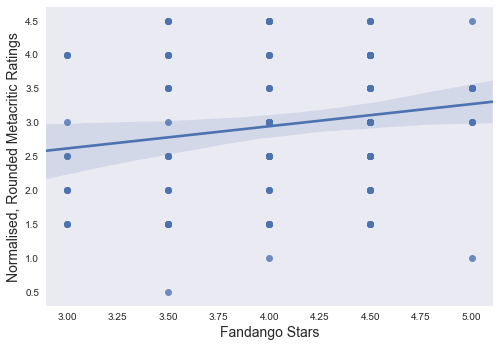

In [52]:
plot = sns.regplot(x=movies["Fandango_Stars"], y=movies["Metacritic_norm_round"], fit_reg=True)
plot.grid(False)
plot.set_xlabel('Fandango Stars', Fontsize = 14)
plot.set_ylabel('Normalised, Rounded Metacritic Ratings', Fontsize = 14)